In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import RFE, SelectKBest, f_regression

from acquire import *
from wrangle_zillow import *

from IPython.display import Markdown

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = get_zillow_data()

<center><h2>Summary of DataFrame</h2></center>

### Total Missing Values
> - There are 7016 missing values.
### DataFrame Head
|    |   id |   bathroomcnt |   bedroomcnt |   calculatedfinishedsquarefeet |   fips |    latitude |    longitude |   lotsizesquarefeet |   propertylandusetypeid |   rawcensustractandblock |   regionidcity |   regionidcounty |   regionidzip |   roomcnt |   yearbuilt |   structuretaxvaluedollarcnt |   taxvaluedollarcnt |   assessmentyear |   landtaxvaluedollarcnt |   taxamount |    logerror | transactiondate   | last_trans_date   |
|---:|-----:|--------------:|-------------:|-------------------------------:|-------:|------------:|-------------:|--------------------:|------------------------:|-------------------------:|---------------:|-----------------:|--------------:|----------:|------------:|-----------------------------:|--------------------:|-----------------:|------------------------:|------------:|------------:|:------------------|:------------------|
|  0 |   10 |             4 |            4 |                           3095 |   6037 | 3.42912e+07 | -1.18578e+08 |                 nan |                     269 |              6.03711e+07 |          12447 |             3101 |         96356 |         0 |        2016 |                       138760 |              192544 |             2016 |                   53784 |     2460.72 |  0.00596317 | 2017-01-02        | 2017-01-02        |
|  1 |   20 |             2 |            4 |                           3633 |   6037 | 3.456e+07   | -1.1817e+08  |                9826 |                     261 |              6.03791e+07 |          40227 |             3101 |         97329 |         0 |        2005 |                       222321 |              296425 |             2016 |                   74104 |     6941.39 |  0.0424629  | 2017-01-02        | 2017-01-02        |
|  2 |   28 |             4 |            5 |                           2865 |   6037 | 3.38792e+07 | -1.18361e+08 |                4990 |                     246 |              6.03762e+07 |          33612 |             3101 |         96124 |         0 |        1972 |                       271704 |              831224 |             2016 |                  559520 |    10455.4  |  0.20647    | 2017-01-02        | 2017-01-02        |
|  3 |   30 |             2 |            2 |                           1090 |   6037 | 3.39741e+07 | -1.18423e+08 |               40247 |                     266 |              6.03728e+07 |          12447 |             3101 |         96072 |         0 |        2004 |                       232897 |              357568 |             2016 |                  124671 |     6165.36 |  0.0218525  | 2017-01-02        | 2017-01-02        |
|  4 |   31 |             4 |            3 |                           1620 |   6037 | 3.39962e+07 | -1.18438e+08 |                 nan |                     261 |              6.03727e+07 |          12447 |             3101 |         96047 |         0 |        2011 |                       339532 |              847770 |             2016 |                  508238 |    10244.9  | -0.0195456  | 2017-01-02        | 2017-01-02        |

### DataFrame Info
|    | column_name                  |   nulls | dtypes   |
|---:|:-----------------------------|--------:|:---------|
|  0 | id                           |       0 | int64    |
|  1 | bathroomcnt                  |       0 | float64  |
|  2 | bedroomcnt                   |       0 | float64  |
|  3 | calculatedfinishedsquarefeet |       0 | float64  |
|  4 | fips                         |       0 | float64  |
|  5 | latitude                     |       0 | float64  |
|  6 | longitude                    |       0 | float64  |
|  7 | lotsizesquarefeet            |    5242 | float64  |
|  8 | propertylandusetypeid        |       0 | float64  |
|  9 | rawcensustractandblock       |       0 | float64  |
| 10 | regionidcity                 |    1331 | float64  |
| 11 | regionidcounty               |       0 | float64  |
| 12 | regionidzip                  |     159 | float64  |
| 13 | roomcnt                      |       0 | float64  |
| 14 | yearbuilt                    |      71 | float64  |
| 15 | structuretaxvaluedollarcnt   |      99 | float64  |
| 16 | taxvaluedollarcnt            |       6 | float64  |
| 17 | assessmentyear               |       0 | float64  |
| 18 | landtaxvaluedollarcnt        |       6 | float64  |
| 19 | taxamount                    |     102 | float64  |
| 20 | logerror                     |       0 | float64  |
| 21 | transactiondate              |       0 | object   |
| 22 | last_trans_date              |       0 | object   |

### DataFrame Description
|                              |   count |             mean |            std |             min |              25% |              50% |              75% |              max |
|:-----------------------------|--------:|-----------------:|---------------:|----------------:|-----------------:|-----------------:|-----------------:|-----------------:|
| id                           |   74244 |  38818.9         |  22348.2       |    10           |  19509.8         |  38762.5         |  58051.2         |  77613           |
| bathroomcnt                  |   74244 |      2.31222     |      1.00148   |     1           |      2           |      2           |      3           |     20           |
| bedroomcnt                   |   74244 |      3.22232     |      1.11993   |     1           |      3           |      3           |      4           |     25           |
| calculatedfinishedsquarefeet |   74244 |   1808.71        |    932.876     |   352           |   1221           |   1581           |   2141           |  26345           |
| fips                         |   74244 |   6048.26        |     20.7975    |  6037           |   6037           |   6037           |   6059           |   6111           |
| latitude                     |   74244 |      3.401e+07   | 243665         |     3.33394e+07 |      3.38344e+07 |      3.40202e+07 |      3.4173e+07  |      3.48069e+07 |
| longitude                    |   74244 |     -1.18215e+08 | 350619         |    -1.19448e+08 |     -1.18411e+08 |     -1.18186e+08 |     -1.17956e+08 |     -1.17556e+08 |
| lotsizesquarefeet            |   69002 |  23335.3         | 118135         |   343           |   5725           |   7013           |   9929.75        |      6.97101e+06 |
| propertylandusetypeid        |   74244 |    261.186       |      4.20089   |   246           |    261           |    261           |    261           |    275           |
| rawcensustractandblock       |   74244 |      6.04857e+07 | 206474         |     6.0371e+07  |      6.0373e+07  |      6.03757e+07 |      6.05904e+07 |      6.11101e+07 |
| regionidcity                 |   72913 |  35415.8         |  52702.3       |  3491           |  12447           |  25218           |  45457           | 396556           |
| regionidcounty               |   74244 |   2582.35        |    779.163     |  1286           |   2061           |   3101           |   3101           |   3101           |
| regionidzip                  |   74085 |  96558.9         |   3878.66      | 95982           |  96186           |  96378           |  96974           | 399675           |
| roomcnt                      |   74244 |      1.55885     |      2.91192   |     0           |      0           |      0           |      0           |     86           |
| yearbuilt                    |   74173 |   1964.63        |     23.3592    |  1808           |   1950           |   1963           |   1982           |   2016           |
| structuretaxvaluedollarcnt   |   74145 | 176088           | 208736         |    10           |  79918           | 129628           | 206239           |      1.04024e+07 |
| taxvaluedollarcnt            |   74238 | 437283           | 540462         |     9           | 192496           | 324583           | 515000           |      3.01668e+07 |
| assessmentyear               |   74244 |   2016           |      0.0416688 |  2014           |   2016           |   2016           |   2016           |   2016           |
| landtaxvaluedollarcnt        |   74238 | 261416           | 381454         |     9           |  79264           | 175816           | 324549           |      1.97645e+07 |
| taxamount                    |   74142 |   5358.7         |   6232.73      |    20.24        |   2542.71        |   4064.68        |   6239.65        | 342940           |
| logerror                     |   74244 |      0.0168669   |      0.171047  |    -4.65542     |     -0.0242413   |      0.00674558  |      0.0394171   |      5.263       |

In [3]:
df = resolve_missing_values(df)

## Run to get summary
# print(summarize(df))

### Takeaways from Acquire:

> - Target variable: `logerror`
> - This dataframe has 74,244 rows and 23 columns
> - The dataset has 162,235 missing values
> - There are 2 `object` based dtypes.

### Data Preperation

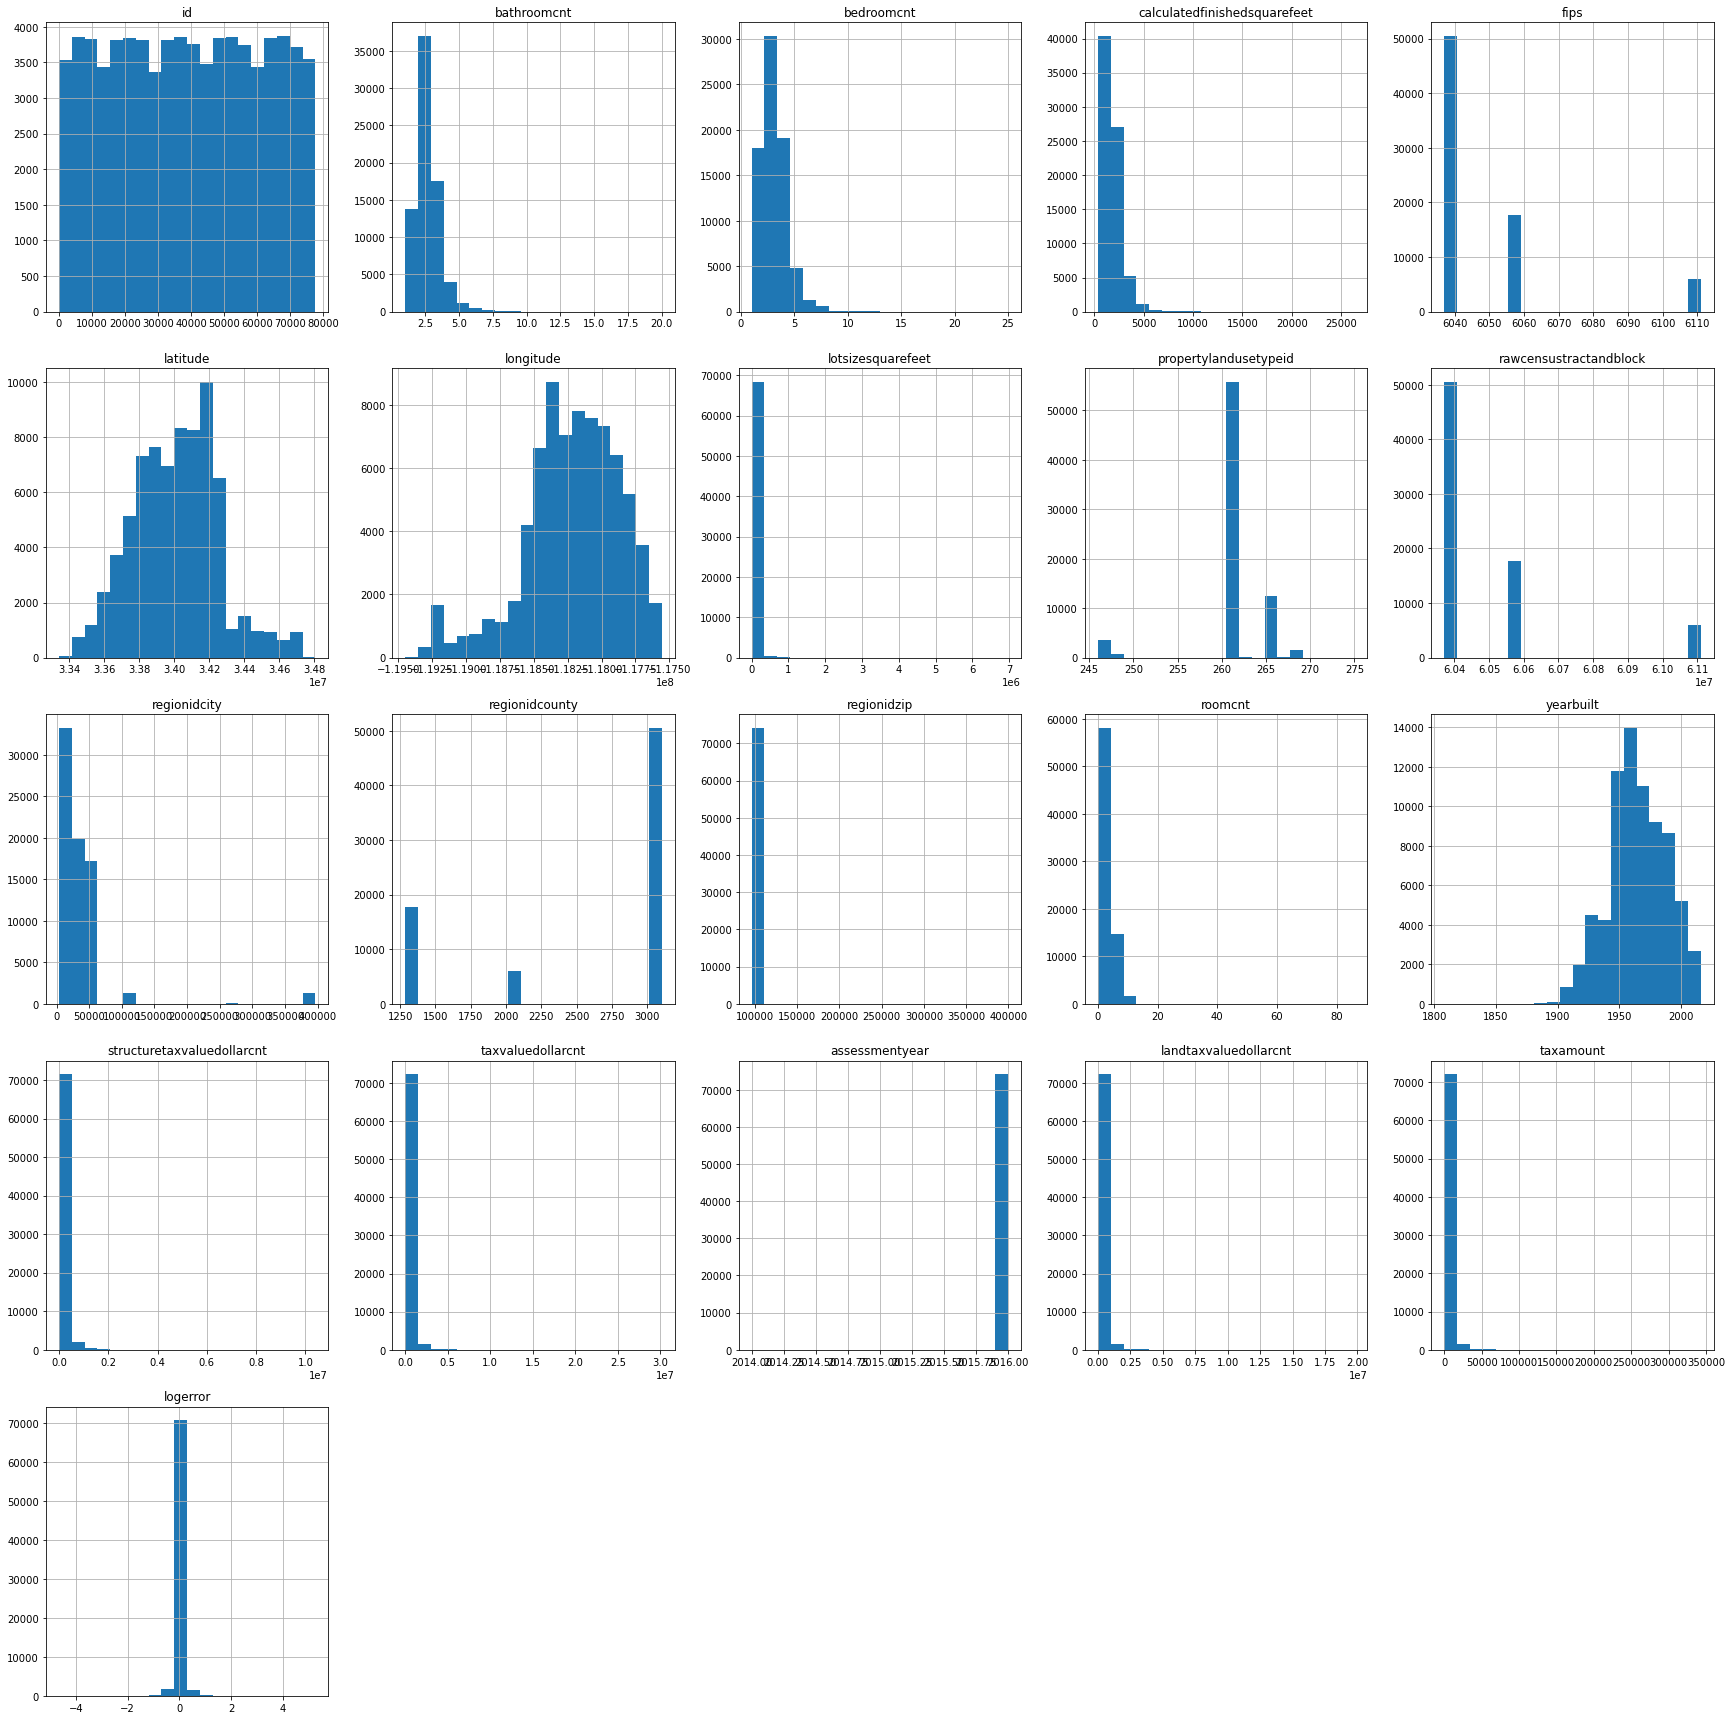

In [4]:
df.hist(figsize=(24, 24), bins=20)
plt.tight_layout()
plt.show()

In [5]:
df = wrangle(df)
df.head()

,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,last_trans_date,county
1,20,2.0,4.0,3633.0,6037.0,34560018.0,-118169806.0,9826.0,261.0,6.037910e+07,...,2005.0,222321.0,296425.0,2016.0,74104.0,6941.39,0.042463,2017-01-02,2017-01-02,Los Angeles
5,33,2.0,3.0,2077.0,6037.0,34012977.0,-118479243.0,6490.0,261.0,6.037702e+07,...,1926.0,210192.0,646760.0,2016.0,436568.0,7924.68,-0.040807,2017-01-02,2017-01-02,Los Angeles
8,45,2.0,4.0,1931.0,6037.0,33990297.0,-118275168.0,5420.0,246.0,6.037233e+07,...,1957.0,124789.0,224617.0,2016.0,99828.0,2885.93,0.082734,2017-01-02,2017-01-02,Los Angeles
10,75,4.0,4.0,3086.0,6037.0,34111765.0,-118045669.0,12843.0,246.0,6.037432e+07,...,1950.0,288506.0,820065.0,2016.0,531559.0,9602.77,0.000161,2017-01-02,2017-01-02,Los Angeles
12,110,1.0,3.0,1244.0,6037.0,33953559.0,-118083855.0,6021.0,261.0,6.037503e+07,...,1950.0,108040.0,169471.0,2016.0,61431.0,2532.88,0.042412,2017-01-03,2017-01-03,Los Angeles


### Split the data

In [6]:
train, validate, test = train_validate_test_split(df)
X_train, X_validate, X_test, y_train, y_validate, y_test = zillow_split(df, 'logerror')

### Scale the data

In [7]:
# Numeric Columns to scale
cols = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'lotsizesquarefeet', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount']
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scaler(
    X_train, X_validate, X_test, cols)

X_train_scaled.head()

,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,transactiondate,last_trans_date,county
61850,64691,0.333333,0.666667,0.182293,6037.0,0.522473,0.676888,0.242636,261.0,6.037531e+07,...,0.0,0.676329,0.250049,0.419332,2016.0,0.367273,0.507793,2017-08-08,2017-08-08,Los Angeles
51997,54226,0.333333,0.333333,0.145095,6037.0,0.539345,0.822211,0.465538,261.0,6.037406e+07,...,0.0,0.690821,0.087696,0.055365,2016.0,0.035401,0.095663,2017-07-06,2017-07-06,Los Angeles
55043,57345,0.333333,0.333333,0.270829,6059.0,0.074608,0.958561,0.399705,261.0,6.059042e+07,...,6.0,0.758454,0.258077,0.132371,2016.0,0.055194,0.122010,2017-07-14,2017-07-14,Orange
31904,33504,0.000000,0.000000,0.126822,6037.0,0.405917,0.599140,0.371281,261.0,6.037604e+07,...,0.0,0.690821,0.371661,0.423923,2016.0,0.327139,0.479772,2017-05-05,2017-05-05,Los Angeles
5234,5611,0.333333,0.333333,0.187949,6037.0,0.563617,0.632638,0.355670,246.0,6.037187e+07,...,0.0,0.560386,0.244924,0.213827,2016.0,0.147810,0.248122,2017-01-26,2017-01-26,Los Angeles


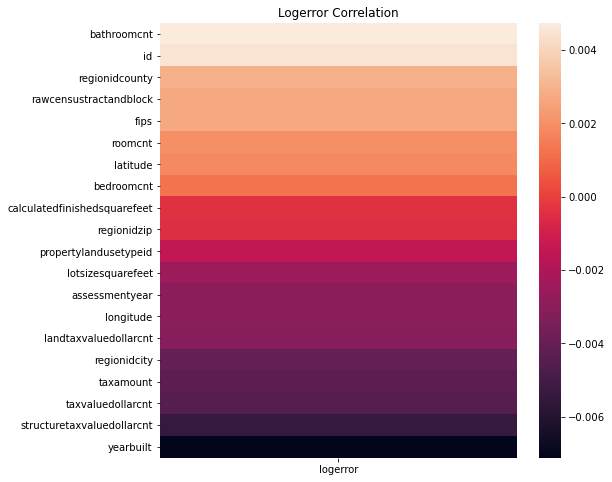

In [8]:
logerror_corr = pd.DataFrame(df.corr().logerror.sort_values(ascending=False)[1:])
plt.figure(figsize=(8,8))
sns.heatmap(logerror_corr).set(title='Logerror Correlation')
plt.show()

In [9]:
logerror_corr

,logerror
bathroomcnt,0.004741
id,0.004474
regionidcounty,0.002920
rawcensustractandblock,0.002694
fips,0.002692
roomcnt,0.001996
latitude,0.001829
bedroomcnt,0.001254
calculatedfinishedsquarefeet,-0.000363
regionidzip,-0.000495


### Feature Engineering

In [10]:
X = X_train[list(X_train.select_dtypes(exclude=['object']).columns)]
y = y_train

#create model
lm = LinearRegression()
#select hyperparameters
rfe = RFE(estimator=lm, n_features_to_select=3)
#fit model
rfe.fit(X, y)
best_features = list(X.columns[rfe.support_])
print('Best Features:', *best_features)

Best Features: bathroomcnt yearbuilt assessmentyear


<Figure size 1152x576 with 0 Axes>

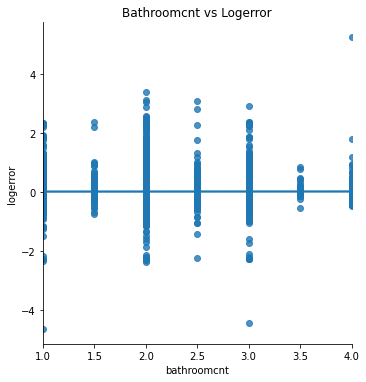

<Figure size 1152x576 with 0 Axes>

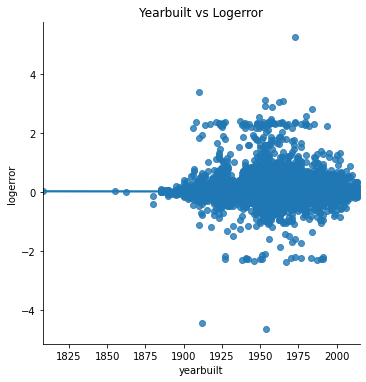

<Figure size 1152x576 with 0 Axes>

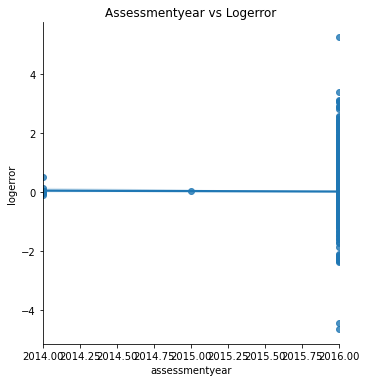

In [11]:
for col in best_features:
    plt.figure(figsize=(16,8))
    sns.lmplot(x=col, y='logerror', data=df).set(title=f'{col.title()} vs Logerror')
plt.show()

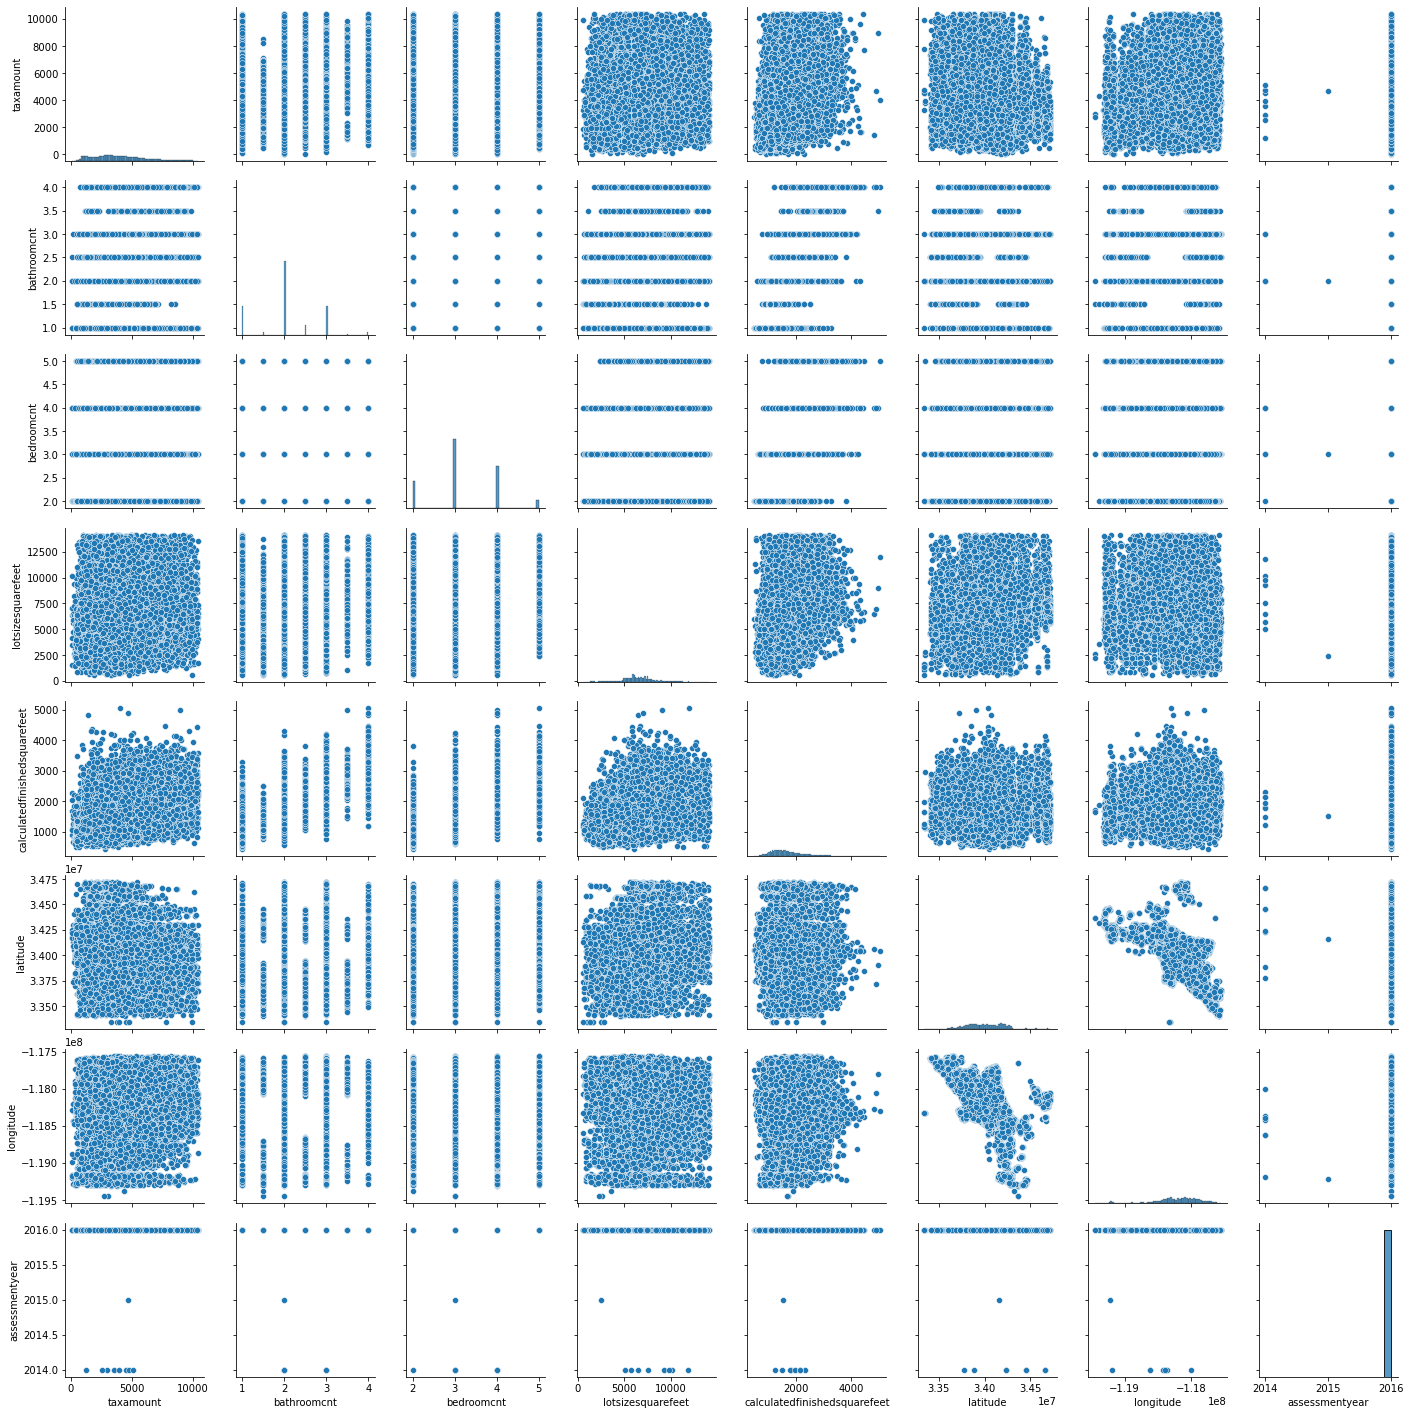

In [15]:
cols = ['taxamount', 'bathroomcnt', 'bedroomcnt',
        'lotsizesquarefeet', 'calculatedfinishedsquarefeet',
        'latitude', 'longitude', 'assessmentyear'
       ]
sns.pairplot(data=train[cols])
plt.show()

### Hypothesis 1: Correlation Test (Logerror vs Bathroomcnt)

In [ ]:
%%html 
<style>
table {margin-left: 0 !important;}
</style>